In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

## Dataset 1

In [2]:
# Loading the dataset
data = pd.read_csv('datasets/network_backup_dataset.csv')

# creating a pandas dataframe
df = pd.DataFrame(data)

df_np = df.values

# Converting 'o' dtype to 'str'
# df['Day of Week'] = df['Day of Week'].astype('str') 


In [3]:
Week_idx = df.iloc[:, [0]]
Day = df.iloc[:, [1]]
bkp_start_time = df.iloc[:, [2]]
workflow_ID = df.iloc[:, [3]]
File_name = df.iloc[:, [4]]
bkp_size = df.iloc[:, [5]]
bkp_time = df.iloc[:, [6]]

In [4]:
#Converting all of the above columns to numpy arrays
Week_idx = np.concatenate(Week_idx.values, axis=0)
Day = np.concatenate(Day.values, axis=0)
bkp_start_time = np.concatenate(bkp_start_time.values, axis=0)
workflow_ID = np.concatenate(workflow_ID.values, axis=0)
File_name = np.concatenate(File_name.values, axis=0)
bkp_size = np.concatenate(bkp_size.values, axis=0)
bkp_time = np.concatenate(bkp_time.values, axis=0)


In [5]:
# Finding the end of 20 day period
i = 0
j = 0
while i < len(Week_idx):
    if (Week_idx[i] == 3) and (Day[i] == 'Sunday'):
        twenty_days = i - 1
        break
    i = i + 1

print("Twenty Day index: {}".format(twenty_days))

Twenty Day index: 3537


In [6]:
# Calculating number of days
i = 0
j = 1
current = Day[0]
day_idx = np.zeros(len(Week_idx))
while i < len(Week_idx):
    day_idx[i] = j
    if Day[i] != current:
        j = j + 1
        current = Day[i]
    if j == 106:
        break
    i = i + 1
        

In [7]:
def sum_days(w, indices):
    summed = []
    new_indices = []
    sum_ = 0
    current_i = None
    for idx, i in enumerate(indices):
        if current_i != i:
            if current_i is not None:
                summed.append(sum_)
                new_indices.append(current_i)
                
            current_i = int(i)
            sum_ = w[idx]
        else:
            # current i matches, sum them
            sum_ += w[idx]
            
    return summed, new_indices

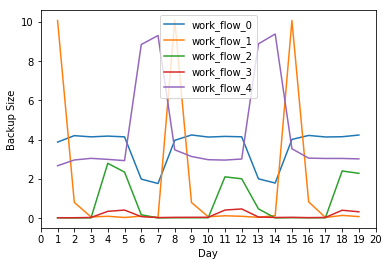

In [8]:
# Plot for 20 days

i = 0
y_idx = np.zeros(twenty_days+1)
colors = np.empty(twenty_days+1, dtype = str)
w_0 = np.zeros(twenty_days+1)
w_1 = np.zeros(twenty_days+1)
w_2 = np.zeros(twenty_days+1)
w_3 = np.zeros(twenty_days+1)
w_4 = np.zeros(twenty_days+1)
while i <= twenty_days:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:twenty_days+1])

summed, new_indices = sum_days(w_0, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4, day_idx[:twenty_days+1])
plt.plot(new_indices, summed)

plt.xticks(np.arange(21, step=1))

plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

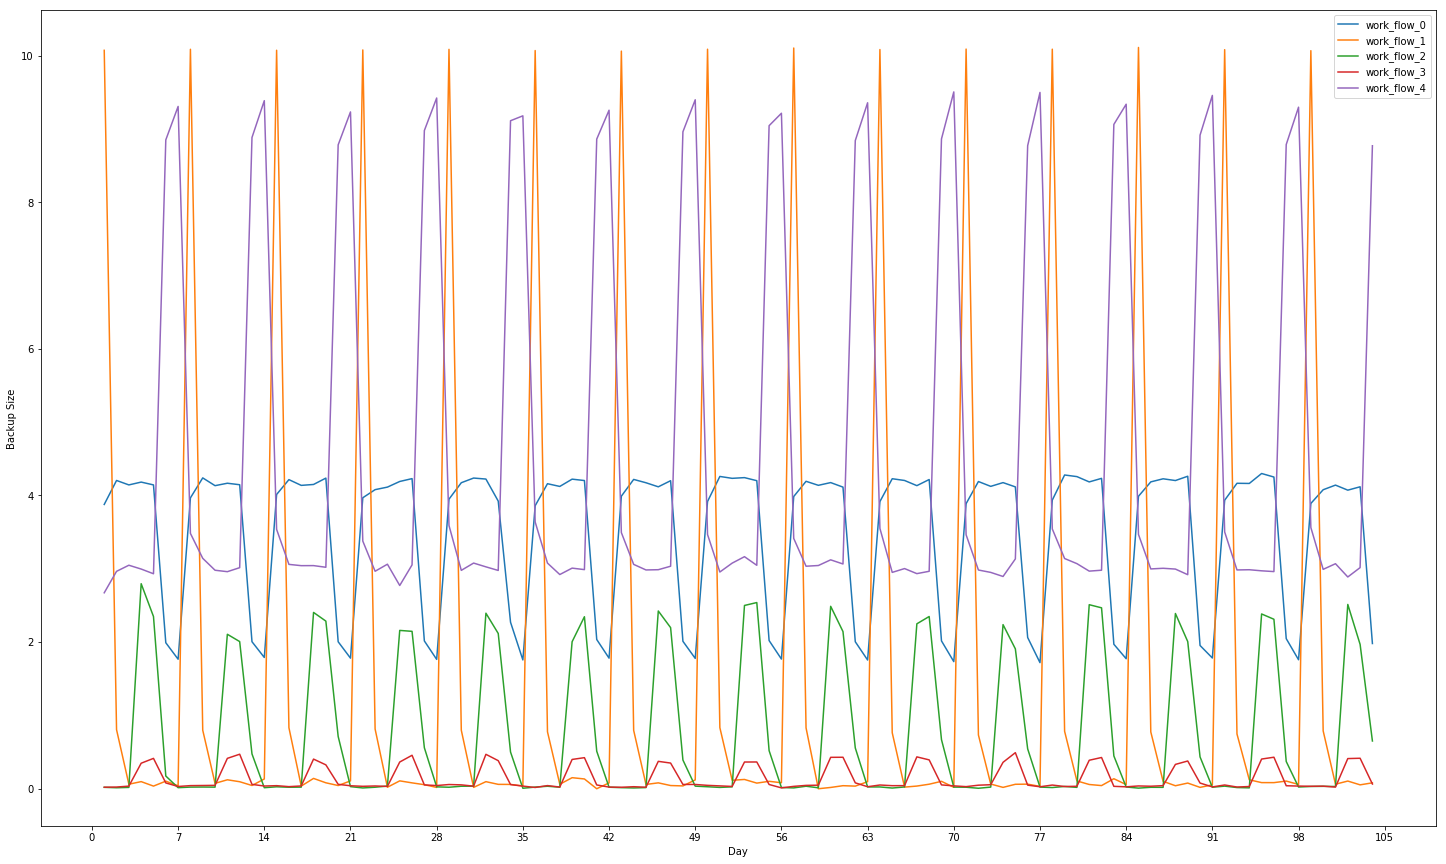

In [9]:
# Plot for 105 days

total_idx = len(Week_idx)
i = 0
y_idx = np.zeros(total_idx)
colors = np.empty(total_idx, dtype = str)
w_0 = np.zeros(total_idx)
w_1 = np.zeros(total_idx)
w_2 = np.zeros(total_idx)
w_3 = np.zeros(total_idx)
w_4 = np.zeros(total_idx)
# w_0[:] = np.nan
# w_1[:] = np.nan
# w_2[:] = np.nan
# w_3[:] = np.nan
# w_4[:] = np.nan
while i < total_idx:
    y_idx[i] = i
    if workflow_ID[i] == 'work_flow_0':
        w_0[i] = w_0[i] + bkp_size[i]
        colors[i] = "g" 
    elif workflow_ID[i] == 'work_flow_1':
        w_1[i] = w_1[i] + bkp_size[i]
        colors[i] = "r" 
    elif workflow_ID[i] == 'work_flow_2':
        w_2[i] = w_2[i] + bkp_size[i]
        colors[i] = "c"
    elif workflow_ID[i] == 'work_flow_3':
        w_3[i] = w_3[i] + bkp_size[i]
        colors[i] = "b"
    elif workflow_ID[i] == 'work_flow_4':
        w_4[i] = w_4[i] + bkp_size[i]
        colors[i] = "k"
    i = i + 1
# plt.plot(y_idx, bkp_size[:total_idx])
plt.figure(figsize=(25,15))

summed, new_indices = sum_days(w_0[np.isfinite(w_0)], day_idx[np.isfinite(w_0)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_1[np.isfinite(w_1)], day_idx[np.isfinite(w_1)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_2[np.isfinite(w_2)], day_idx[np.isfinite(w_2)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_3[np.isfinite(w_3)], day_idx[np.isfinite(w_3)])
plt.plot(new_indices, summed)

summed, new_indices = sum_days(w_4[np.isfinite(w_4)], day_idx[np.isfinite(w_4)])
plt.plot(new_indices, summed)

plt.xticks(np.arange(106, step=7))
plt.xlabel('Day')
plt.ylabel('Backup Size')
plt.legend(['work_flow_0', 'work_flow_1', 'work_flow_2', 'work_flow_3', 'work_flow_4'])
plt.show()

## Scalar Encoding

In [10]:
# Scalar encoding

# Days
i = 0
Day_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if Day[i] == 'Monday':
        Day_encoded[i] = 1
    if Day[i] == 'Tuesday':
        Day_encoded[i] = 2
    if Day[i] == 'Wednesday':
        Day_encoded[i] = 3
    if Day[i] == 'Thursday':
        Day_encoded[i] = 4
    if Day[i] == 'Friday':
        Day_encoded[i] = 5
    if Day[i] == 'Saturday':
        Day_encoded[i] = 6
    if Day[i] == 'Sunday':
        Day_encoded[i] = 7
    i = i + 1
    
# workflow_ID
i = 0
workflow_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    if workflow_ID[i] == 'work_flow_0':
        workflow_encoded[i] = 0
    elif workflow_ID[i] == 'work_flow_1':
        workflow_encoded[i] = 1
    elif workflow_ID[i] == 'work_flow_2':
        workflow_encoded[i] = 2
    elif workflow_ID[i] == 'work_flow_3':
        workflow_encoded[i] = 3
    elif workflow_ID[i] == 'work_flow_4':
        workflow_encoded[i] = 4
    i = i + 1

# hour of the day
hour_encoded = bkp_start_time

# week number
Week_encoded = Week_idx

# backup size
size_encoded = bkp_size

# File name
i = 0
file_name_encoded = np.zeros(len(Week_idx))
while i < len(Week_idx):
    file_name_encoded[i] = int(File_name[i][5:8])
    i = i + 1

# Combine all into 1
X_encoded = np.hstack((Day_encoded.reshape(-1,1), workflow_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, hour_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, Week_encoded.reshape(-1,1)))
X_encoded = np.hstack((X_encoded, file_name_encoded.reshape(-1,1)))    

# Y encoded
Y_encoded = size_encoded.reshape(-1,1)

## Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

In [12]:
model = LinearRegression()
num_folds = 10

# randomly shuffling arrays
randomize = np.arange(len(X_encoded))
np.random.shuffle(randomize)
X_encoded = X_encoded[randomize]
Y_encoded = Y_encoded[randomize]

In [13]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded[trainset], Y_encoded[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    i = i + 1
    

RMSE Training for fold 0 = 0.10497357744787067
RMSE Testing for fold 0 = 0.0902159596888504
RMSE Training for fold 1 = 0.10500983755910381
RMSE Testing for fold 1 = 0.08983711028429256
RMSE Training for fold 2 = 0.10039732110039301
RMSE Testing for fold 2 = 0.12887480557061803
RMSE Training for fold 3 = 0.10394861318801163
RMSE Testing for fold 3 = 0.10033452247236828
RMSE Training for fold 4 = 0.10359911536648504
RMSE Testing for fold 4 = 0.1035175063251347
RMSE Training for fold 5 = 0.10208513019526994
RMSE Testing for fold 5 = 0.11628355884880105
RMSE Training for fold 6 = 0.10398078168626859
RMSE Testing for fold 6 = 0.10002870127605956
RMSE Training for fold 7 = 0.10454446439609257
RMSE Testing for fold 7 = 0.09457278147255409
RMSE Training for fold 8 = 0.10359063242111224
RMSE Testing for fold 8 = 0.10359229497800078
RMSE Training for fold 9 = 0.10365836461419212
RMSE Testing for fold 9 = 0.10298981023137514


In [14]:
# print('Average RMSE Training = {}'.format(np.mean(rmse_per_fold_train)))
# print('Average RMSE Testing = {}'.format(np.mean(rmse_per_fold_test)))
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))

Average RMSE Training = 0.10358727161277652
Average RMSE Testing = 0.10363933351603846


#### Scatter Plots

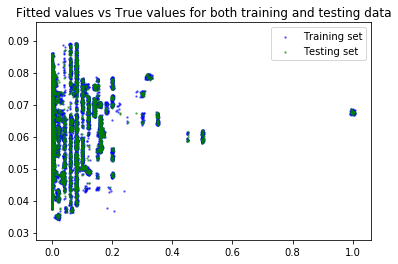

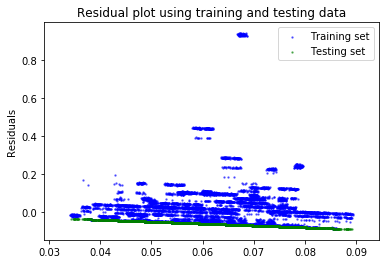

In [15]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test) - y_test, c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## Random Forest

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# Parameters for RadomForestRegressor
Num_trees = 20
Depth_trees = 4
Bootstrap = True
Max_features = 5

In [18]:
model = RandomForestRegressor(n_estimators = Num_trees, max_features = Max_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
num_folds = 10

Y_encoded_rf = Y_encoded.ravel()


## (2) i

In [19]:
kf = KFold(n_splits=num_folds)
rmse_per_fold_train = []
rmse_per_fold_test = []
oob_error_per_fold = []
i = 0
for trainset, testset in kf.split(X_encoded):
    X_train, X_test = X_encoded[trainset], X_encoded[testset]
    y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
    model.fit(X_train, y_train)
#     rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#     rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
    rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
    rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    oob_error = 1 - model.oob_score_
    oob_error_per_fold.append(oob_error)
    print('----------------------------------------------------')
    print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    print('Out of Bag error for fold {} = {}'.format(i, oob_error))
    print('----------------------------------------------------')
    i = i + 1

----------------------------------------------------
RMSE Training for fold 0 = 0.0600865677950634
RMSE Testing for fold 0 = 0.05399522634187935
Out of Bag error for fold 0 = 0.33227735969269245
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 1 = 0.060448119646542835
RMSE Testing for fold 1 = 0.06444399794579528
Out of Bag error for fold 1 = 0.34017957113895636
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 2 = 0.05994853484842274
RMSE Testing for fold 2 = 0.05764470382928518
Out of Bag error for fold 2 = 0.33467726175082624
----------------------------------------------------
----------------------------------------------------
RMSE Training for fold 3 = 0.06048915571483007
RMSE Testing for fold 3 = 0.06461602838664651
Out of Bag error for fold 3 = 0.3433558427486101
----------------------------------------------------
-----

In [20]:
print('Average RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
print('Average RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
print('Average Out of Bag Error = {}'.format(np.mean(oob_error_per_fold)))

Average RMSE Training = 0.06046059941919135
Average RMSE Testing = 0.060188191610227
Average Out of Bag Error = 0.3391803298825288


## (2) ii

In [21]:
features_array = np.arange(1,6)
trees_array = np.arange(1,201)

-----------------------------------------------------
Number of trees = 1
Number of features = 1
RMSE Training = 0.08550222107070259
RMSE Testing = 0.08471960411486082
Out of Bag error = 1.102582411437799
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 2
Number of features = 1
RMSE Training = 0.08116660203820036
RMSE Testing = 0.07968524063713855
Out of Bag error = 0.9333532039195467
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 3
Number of features = 1
RMSE Training = 0.07835082376904778
RMSE Testing = 0.07805716544820898
Out of Bag error = 0.8138798637407257
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 1
RMSE Training = 0.07821992552292764
RMSE Testing = 0.07815279647549322
Out of Bag error = 0.752224254380521
----------------

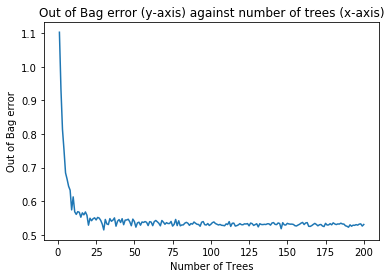

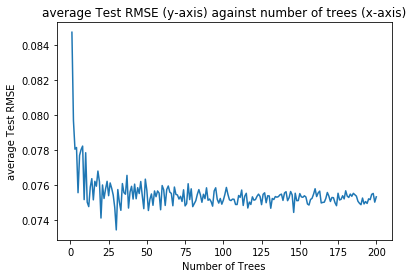

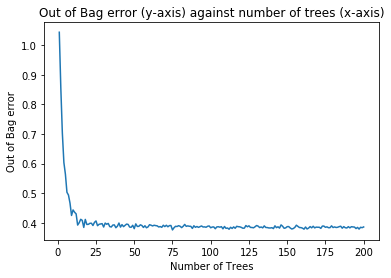

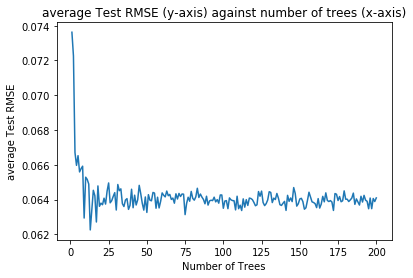

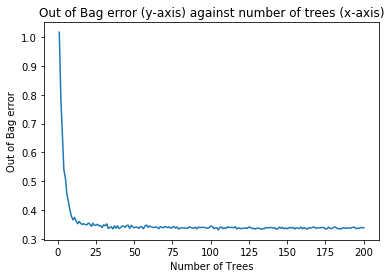

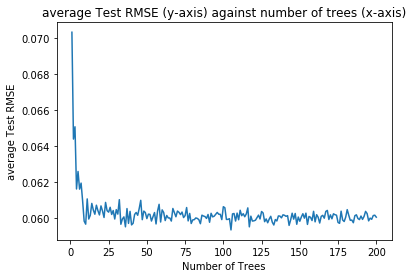

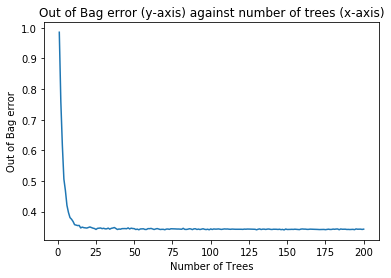

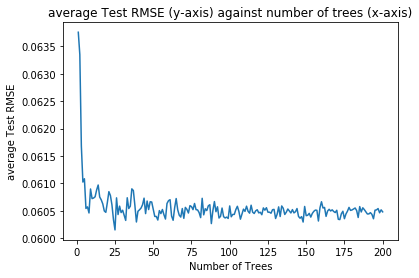

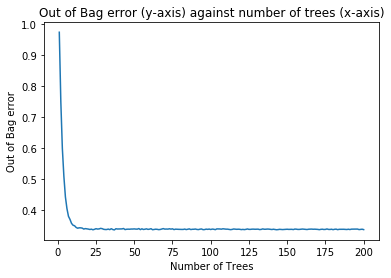

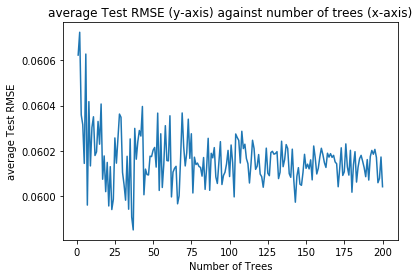

In [22]:
i = 0;
j = 0;
best = []
while i < len(features_array):
    total_rmse_per_fold_train = []
    total_rmse_per_fold_test = []
    total_oob_error_per_fold = []
    while j < len(trees_array):
        Num_trees = trees_array[j]
        Num_features = features_array[i]
        model = RandomForestRegressor(n_estimators = Num_trees, max_features = Num_features, 
                              max_depth = Depth_trees, bootstrap = Bootstrap, oob_score=True)
        num_folds = 10
        kf = KFold(n_splits=num_folds)
        rmse_per_fold_train = []
        rmse_per_fold_test = []
        oob_error_per_fold = []
        k = 0
        for trainset, testset in kf.split(X_encoded):
            X_train, X_test = X_encoded[trainset], X_encoded[testset]
            y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
            model.fit(X_train, y_train)
#             rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#             rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test)))
            rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
            oob_error = 1 - model.oob_score_
            oob_error_per_fold.append(oob_error)
        total_rmse_per_fold_train.append(np.sqrt(np.mean(rmse_per_fold_train)))
        total_rmse_per_fold_test.append(np.sqrt(np.mean(rmse_per_fold_test)))
        total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
        print('-----------------------------------------------------')
        print('Number of trees = %d' % Num_trees)
        print('Number of features = %d' % Num_features)
        print('RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
        print('RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
        print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
        print('-----------------------------------------------------')
        j = j + 1
    best.append(np.argmin(total_oob_error_per_fold))
    plt.figure()
    plt.plot(trees_array, total_oob_error_per_fold)
    plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('Out of Bag error')
    
    plt.figure()
    plt.plot(trees_array, total_rmse_per_fold_test)
    plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
    plt.xlabel('Number of Trees')
    plt.ylabel('average Test RMSE')
    j = 0
    i = i + 1

In [23]:
best

[29, 12, 104, 24, 36]

## (2) iii

In [24]:
depth_array = np.arange(1,41)
Best_num_features = 3
Best_num_trees = 4

-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 1
RMSE Training = 0.0974215018609527
RMSE Testing = 0.09697876947992463
Out of Bag error = 0.9524838604943913
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 2
RMSE Training = 0.08699887708081801
RMSE Testing = 0.08641245140166895
Out of Bag error = 0.8257153518999661
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 3
RMSE Training = 0.07908254354625782
RMSE Testing = 0.07865432682714282
Out of Bag error = 0.7263215644199719
-----------------------------------------------------
-----------------------------------------------------
Number of trees = 4
Number of features = 3
Depth of trees = 4
RMSE Training = 0.06420132622492608
RMSE Testing

Text(0, 0.5, 'average Test RMSE')

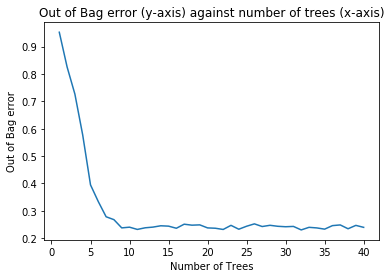

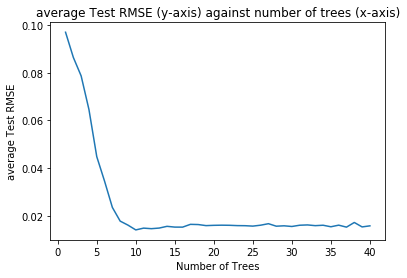

In [25]:
j = 0;
total_rmse_per_fold_train = []
total_rmse_per_fold_test = []
total_oob_error_per_fold = []
while j < len(depth_array):
    depth_trees = depth_array[j]
    model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = depth_trees, bootstrap = Bootstrap, oob_score=True)
    num_folds = 10
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    oob_error_per_fold = []
    k = 0
    for trainset, testset in kf.split(X_encoded):
        X_train, X_test = X_encoded[trainset], X_encoded[testset]
        y_train, y_test = Y_encoded_rf[trainset], Y_encoded_rf[testset]
        model.fit(X_train, y_train)
#         rmse_per_fold_train.append(sqrt(mean_squared_error(y_train, model.predict(X_train))))
#         rmse_per_fold_test.append(sqrt(mean_squared_error(y_test, model.predict(X_test))))
        rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
        oob_error = 1 - model.oob_score_
        oob_error_per_fold.append(oob_error)
    total_rmse_per_fold_train.append(np.sqrt(np.mean(rmse_per_fold_train)))
    total_rmse_per_fold_test.append(np.sqrt(np.mean(rmse_per_fold_test)))
    total_oob_error_per_fold.append(np.mean(oob_error_per_fold))
    print('-----------------------------------------------------')
    print('Number of trees = %d' % Best_num_trees)
    print('Number of features = %d' % Best_num_features)
    print('Depth of trees = %d' % depth_trees)
    print('RMSE Training = {}'.format(np.sqrt(np.mean(rmse_per_fold_train))))
    print('RMSE Testing = {}'.format(np.sqrt(np.mean(rmse_per_fold_test))))
    print('Out of Bag error = {}'.format(np.mean(oob_error_per_fold)))
    print('-----------------------------------------------------')
    j = j + 1
    
best_depth = np.argmin(total_oob_error_per_fold)

plt.figure()
plt.plot(depth_array, total_oob_error_per_fold)
plt.title('Out of Bag error (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('Out of Bag error')

plt.figure()
plt.plot(depth_array, total_rmse_per_fold_test)
plt.title('average Test RMSE (y-axis) against number of trees (x-axis)')
plt.xlabel('Number of Trees')
plt.ylabel('average Test RMSE')    
    


In [26]:
best_depth

9

## (2) iv

In [27]:
best_depth = 12

In [28]:
model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = best_depth, bootstrap = Bootstrap, oob_score=True)

model.fit(X_encoded,Y_encoded_rf)

importantFeatures = model.feature_importances_
print("Feature Importances for best Random Forest Regression : ", importantFeatures)

Feature Importances for best Random Forest Regression :  [0.27313774 0.0320815  0.36484796 0.00739645 0.32253635]


## Scatter Plots

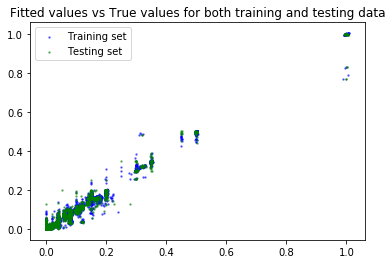

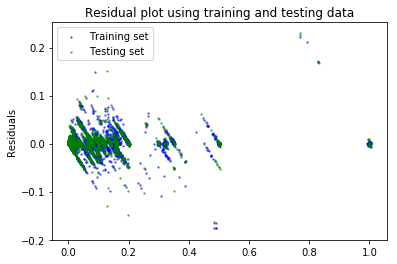

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded_rf, test_size=0.25, random_state=1)

model.fit(X_train, y_train)

pred_train = model.predict(X_train)


# Fitted values vs true values
plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Fitted values vs True values for both training and testing data')
# plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])

plt.figure()
# Residuals vs Fitted values
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
# plt.hlines(y=0,xmin=0,xmax=50)
plt.title('Residual plot using training and testing data')
plt.ylabel('Residuals')
plt.legend(['Training set', 'Testing set'])
# predicted_Y = model.predict(X_encoded)

# residual_values = np.linalg.norm(Y_encoded - model.predict(X_encoded)) ** 2

## (2) v

In [30]:
from sklearn.tree import export_graphviz
import os

X_vis = df[['Week #', 'Day of Week', 'Backup Start Time - Hour of Day', 'Work-Flow-ID', 'File Name']]
Y_vis = df['Size of Backup (GB)']

model = RandomForestRegressor(n_estimators = Best_num_trees, max_features = Best_num_features, 
                              max_depth = 4)

model.fit(X_encoded,Y_encoded_rf)

estimator = model.estimators_[0]

export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X_vis.columns,
                class_names = Y_vis,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

# for i in range(1,25):
#     export_graphviz(model.estimators_[0],
#                 feature_names=X_vis.columns,
#                 filled=True,
#                 rounded=True)
#     os.system('dot -Tpng tree.dot -o'+str(i)+'_tree.png')

FileNotFoundError: [WinError 2] The system cannot find the file specified

## Neural Network

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
def model_scatter_plots(model, X_train, y_train, X_test, y_test):

    # Fitted values vs true values
    plt.figure()
    plt.scatter(y_train, model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(y_test, model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Fitted values vs True values for both training and testing data')
    # plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()

    plt.figure()
    # Residuals vs Fitted values
    plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c='b', s=2, alpha=0.5)
    plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c='g', s=2, alpha=0.5)
    # plt.hlines(y=0,xmin=0,xmax=50)
    plt.title('Residual plot using training and testing data')
    plt.ylabel('Residuals')
    plt.legend(['Training set', 'Testing set'])
    plt.show()
    # predicted_Y = nn.predict(X_encoded)

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


In [ ]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)
# print(enc.categories_)
# print(np.shape(enc.get_feature_names()))
# print(enc.get_feature_names())

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_relu = []
avg_test_rmses_relu = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='relu', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_relu.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_relu.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_logistic = []
avg_test_rmses_logistic = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='logistic', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_logistic.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_logistic.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
kf = KFold(n_splits=10)
layer_sizes = np.concatenate((np.array([2, 5, 10]), np.arange(1, 13)*50))
avg_train_rmses_tanh = []
avg_test_rmses_tanh = []
for size in layer_sizes:
    train_rmses = []
    test_rmses = []
    for trainset, testset in kf.split(train_data):
        nn = MLPRegressor(hidden_layer_sizes=(size,), activation='tanh', random_state=0)
        nn.fit(enc.transform(train_data[trainset]), target_data[trainset])
        
        predicted_test = nn.predict(enc.transform(train_data[testset]))
        predicted_train = nn.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for hidden layer size {} = '.format(size), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmses_tanh.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_tanh.append(np.sqrt(np.mean(test_rmses)))

In [ ]:
plt.figure()
plt.plot(layer_sizes, avg_test_rmses_relu)
plt.plot(layer_sizes, avg_test_rmses_logistic)
plt.plot(layer_sizes, avg_test_rmses_tanh)
plt.legend(['relu', 'logistic', 'tanh'])
plt.xlabel('hidden layer size')
plt.ylabel('average test RMSE')
plt.show()

In [ ]:
print('Best combination: {} hidden layers with ReLU gives RMSE {}'.format(layer_sizes[np.argmin(avg_test_rmses_relu)], 
                                                                          np.min(avg_test_rmses_relu)))

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
best_layer_size = 400
best_activation = 'relu'

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(enc.transform(train_data), target_data, 
                                                    test_size=0.1, random_state=0)

nn = MLPRegressor(hidden_layer_sizes=(best_layer_size,), activation=best_activation, random_state=0)
nn.fit(X_train, y_train)

model_scatter_plots(nn, X_train, y_train, X_test, y_test)

## Predicting backup sizes for each workflow

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values


#### Linear Regression

In [ ]:
data_wf0_enc = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_enc = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_enc = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_enc = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_enc = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_enc = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_enc = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_enc = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_enc = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_enc = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
def analyze_wf_se_lr(data, target):

    model = LinearRegression()
    kf = KFold(n_splits=num_folds)
    rmse_per_fold_train = []
    rmse_per_fold_test = []
    for trainset, testset in kf.split(data):
        X_train, X_test = data[trainset], data[testset]
        y_train, y_test = target[trainset], target[testset]
        model.fit(X_train, y_train)
        rmse_per_fold_train.append(mean_squared_error(y_train, model.predict(X_train)))
        rmse_per_fold_test.append(mean_squared_error(y_test, model.predict(X_test)))
    #     print('RMSE Training for fold {} = {}'.format(i, sqrt(mean_squared_error(y_train, model.predict(X_train)))))
    #     print('RMSE Testing for fold {} = {}'.format(i, sqrt(mean_squared_error(y_test, model.predict(X_test)))))
    #     print(' ')
    print('Average train RMSE:', np.sqrt(np.mean(rmse_per_fold_train)))
    print('Average test RMSE:', np.sqrt(np.mean(rmse_per_fold_test)))

In [ ]:
# Workflow 0

analyze_wf_se_lr(data_wf0_enc, target_wf0_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 1

analyze_wf_se_lr(data_wf1_enc, target_wf1_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 2

analyze_wf_se_lr(data_wf2_enc, target_wf2_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 3

analyze_wf_se_lr(data_wf3_enc, target_wf3_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 4

analyze_wf_se_lr(data_wf4_enc, target_wf4_enc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

#### Polynomial fit

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
# Get scalar-encoded data per workflow

data_wf0_se = X_encoded[np.where(X_encoded[:,1]==0)]
target_wf0_se = Y_encoded[np.where(X_encoded[:,1]==0)]
data_wf1_se = X_encoded[np.where(X_encoded[:,1]==1)]
target_wf1_se = Y_encoded[np.where(X_encoded[:,1]==1)]
data_wf2_se = X_encoded[np.where(X_encoded[:,1]==2)]
target_wf2_se = Y_encoded[np.where(X_encoded[:,1]==2)]
data_wf3_se = X_encoded[np.where(X_encoded[:,1]==3)]
target_wf3_se = Y_encoded[np.where(X_encoded[:,1]==3)]
data_wf4_se = X_encoded[np.where(X_encoded[:,1]==4)]
target_wf4_se = Y_encoded[np.where(X_encoded[:,1]==4)]

In [ ]:
# Get data per workflow to be used in one-hot encoding

data_wf0 = train_data[np.where(train_data[:,3]=='work_flow_0')]
target_wf0 = target_data[np.where(train_data[:,3]=='work_flow_0')]
data_wf1 = train_data[np.where(train_data[:,3]=='work_flow_1')]
target_wf1 = target_data[np.where(train_data[:,3]=='work_flow_1')]
data_wf2 = train_data[np.where(train_data[:,3]=='work_flow_2')]
target_wf2 = target_data[np.where(train_data[:,3]=='work_flow_2')]
data_wf3 = train_data[np.where(train_data[:,3]=='work_flow_3')]
target_wf3 = target_data[np.where(train_data[:,3]=='work_flow_3')]
data_wf4 = train_data[np.where(train_data[:,3]=='work_flow_4')]
target_wf4 = target_data[np.where(train_data[:,3]=='work_flow_4')]

In [ ]:
# Define functions to get RMSE's for scalar and one-hot encoded data, with polynomial features.

def analyze_wf_se_poly(data, target, model):

    avg_train_rmse_se = []
    avg_test_rmse_se = []
    for d in degrees:
#         model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_se_poly = pf.fit_transform(data)

        rmse_per_fold_train_se = []
        rmse_per_fold_test_se = []

        for trainset, testset in kf.split(data_se_poly):
            X_train, X_test = data_se_poly[trainset], data_se_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_se.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test_se.append(mean_squared_error(y_test, model.predict(X_test)))

        avg_train_rmse_se.append(np.sqrt(np.mean(rmse_per_fold_train_se)))
        avg_test_rmse_se.append(np.sqrt(np.mean(rmse_per_fold_test_se)))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (scalar):', np.sqrt(np.mean(rmse_per_fold_train_se)))
        print('Average test RMSE (scalar):', np.sqrt(np.mean(rmse_per_fold_test_se)))
        print(' ')
        
    return avg_train_rmse_se, avg_test_rmse_se
        
def analyze_wf_oh_poly(data, target, model, enc):
    avg_train_rmse_oh = []
    avg_test_rmse_oh = []
    data_oh = enc.transform(data)
    for d in degrees:
        model = LinearRegression()
        kf = KFold(n_splits=num_folds)
        pf = PolynomialFeatures(d)
        data_oh_poly = pf.fit_transform(data_oh)

        rmse_per_fold_train_oh = []
        rmse_per_fold_test_oh = []

        for trainset, testset in kf.split(data_oh_poly):
            X_train, X_test = data_oh_poly[trainset], data_oh_poly[testset]
            y_train, y_test = target[trainset], target[testset]
            model.fit(X_train, y_train)
            rmse_per_fold_train_oh.append(mean_squared_error(y_train, model.predict(X_train)))
            rmse_per_fold_test_oh.append(mean_squared_error(y_test, model.predict(X_test)))

        avg_train_rmse_oh.append(np.sqrt(np.mean(rmse_per_fold_train_oh)))
        avg_test_rmse_oh.append(np.sqrt(np.mean(rmse_per_fold_test_oh)))

        print('Polynomial degree = {}'.format(d))
        print('Average train RMSE (one hot):', np.sqrt(np.mean(rmse_per_fold_train_oh)))
        print('Average test RMSE (one hot):', np.sqrt(np.mean(rmse_per_fold_test_oh)))
        print(' ')
    return avg_train_rmse_oh, avg_test_rmse_oh

In [ ]:
degrees = np.arange(2, 11)

enc = OneHotEncoder()
enc.fit(train_data)

In [ ]:
# Workflow 0 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf0_se, avg_test_rmse_wf0_se = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
# Workflow 0 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf0_oh, avg_test_rmse_wf0_oh = analyze_wf_oh_poly(data_wf0, target_wf0, model, enc)

In [ ]:
# Workflow 1 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf1_se, avg_test_rmse_wf1_se = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
# Workflow 1 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf1_oh, avg_test_rmse_wf1_oh = analyze_wf_oh_poly(data_wf1, target_wf1, model, enc)

In [ ]:
# Workflow 2 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf2_se, avg_test_rmse_wf2_se = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
# Workflow 2 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf2_oh, avg_test_rmse_wf2_oh = analyze_wf_oh_poly(data_wf2, target_wf2, model, enc)

In [ ]:
# Workflow 3 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf3_se, avg_test_rmse_wf3_se = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
# Workflow 3 - one hot encoded

model = LinearRegression()
avg_train_rmse_wf3_oh, avg_test_rmse_wf3_oh = analyze_wf_oh_poly(data_wf3, target_wf3, model, enc)

In [ ]:
# Workflow 4 - scalar encoded

model = LinearRegression()
avg_train_rmse_wf4_se, avg_test_rmse_wf4_se = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
# Workflow 4 - one hot encoded

avg_train_rmse_wf4_oh, avg_test_rmse_wf4_oh = analyze_wf_oh_poly(data_wf4, target_wf4, enc)

In [ ]:
# Plot RMSE vs polynomial degree, scalar encoding

plt.figure()
plt.plot(degrees, avg_train_rmse_wf0)
plt.plot(degrees, avg_train_rmse_wf1)
plt.plot(degrees, avg_train_rmse_wf2)
plt.plot(degrees, avg_train_rmse_wf3)
plt.plot(degrees, avg_train_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0)
plt.plot(degrees, avg_test_rmse_wf1)
plt.plot(degrees, avg_test_rmse_wf2)
plt.plot(degrees, avg_test_rmse_wf3)
plt.plot(degrees, avg_test_rmse_wf4)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [ ]:
# Plot RMSE vs polynomial degree, one hot encoding

plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_oh)
plt.plot(degrees, avg_train_rmse_wf1_oh)
plt.plot(degrees, avg_train_rmse_wf2_oh)
plt.plot(degrees, avg_train_rmse_wf3_oh)
plt.plot(degrees, avg_train_rmse_wf4_oh)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_oh)
plt.plot(degrees, avg_test_rmse_wf1_oh)
plt.plot(degrees, avg_test_rmse_wf2_oh)
plt.plot(degrees, avg_test_rmse_wf3_oh)
plt.plot(degrees, avg_test_rmse_wf4_oh)

plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

In [ ]:
best_deg = 8


In [ ]:
# Workflow 0

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf0_enc_poly = pf.fit_transform(data_wf0_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf0_enc_poly, target_wf0_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 1

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf1_enc_poly = pf.fit_transform(data_wf1_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf1_enc_poly, target_wf1_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 2

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf2_enc_poly = pf.fit_transform(data_wf2_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf2_enc_poly, target_wf2_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 3

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf3_enc_poly = pf.fit_transform(data_wf3_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf3_enc_poly, target_wf3_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
# Workflow 4

model = LinearRegression()
kf = KFold(n_splits=num_folds)
pf = PolynomialFeatures(best_deg)
data_wf4_enc_poly = pf.fit_transform(data_wf4_enc)

X_train, X_test, y_train, y_test = train_test_split(data_wf4_enc_poly, target_wf4_enc, test_size=0.1, random_state=0)
model.fit(X_train, y_train)

model_scatter_plots(model, X_train, y_train, X_test, y_test)

In [ ]:
import warnings
warnings.simplefilter("ignore")

In [ ]:
model = Lasso()

avg_train_rmse_wf0_se_lasso, avg_test_rmse_wf0_se_lasso = analyze_wf_se_poly(data_wf0_se, target_wf0_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf1_se_lasso, avg_test_rmse_wf1_se_lasso = analyze_wf_se_poly(data_wf1_se, target_wf1_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf2_se_lasso, avg_test_rmse_wf2_se_lasso = analyze_wf_se_poly(data_wf2_se, target_wf2_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf3_se_lasso, avg_test_rmse_wf3_se_lasso = analyze_wf_se_poly(data_wf3_se, target_wf3_se, model)

In [ ]:
model = Lasso()

avg_train_rmse_wf4_se_lasso, avg_test_rmse_wf4_se_lasso = analyze_wf_se_poly(data_wf4_se, target_wf4_se, model)

In [ ]:
plt.figure()
plt.plot(degrees, avg_train_rmse_wf0_se_lasso)
plt.plot(degrees, avg_train_rmse_wf1_se_lasso)
plt.plot(degrees, avg_train_rmse_wf2_se_lasso)
plt.plot(degrees, avg_train_rmse_wf3_se_lasso)
plt.plot(degrees, avg_train_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average training RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

plt.figure()
plt.plot(degrees, avg_test_rmse_wf0_se_lasso)
plt.plot(degrees, avg_test_rmse_wf1_se_lasso)
plt.plot(degrees, avg_test_rmse_wf2_se_lasso)
plt.plot(degrees, avg_test_rmse_wf3_se_lasso)
plt.plot(degrees, avg_test_rmse_wf4_se_lasso)

plt.xlabel('degree of polynomial')
plt.ylabel('average testing RMSE')
plt.legend(['wf0', 'wf1', 'wf2', 'wf3', 'wf4'])
plt.show()

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [ ]:
data_new = data.drop(labels=['Backup Time (hour)'], axis=1)
target_data = data_new['Size of Backup (GB)'].values
train_data = data_new.drop(labels=['Size of Backup (GB)'], axis=1).values

In [ ]:
enc = OneHotEncoder(categories='auto')
enc.fit(train_data)

In [ ]:
# One hot encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

avg_train_rmse_oh = []
avg_test_rmse_oh = []

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(train_data):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(enc.transform(train_data[trainset]), target_data[trainset])

        predicted_test = knr.predict(enc.transform(train_data[testset]))
        predicted_train = knr.predict(enc.transform(train_data[trainset]))
        
        train_rmses.append(mean_squared_error(target_data[trainset], predicted_train))
        test_rmses.append(mean_squared_error(target_data[testset], predicted_test))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmse_oh.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmse_oh.append(np.sqrt(np.mean(test_rmses)))
    

In [ ]:
# Scalar encoding

num_neighbors = np.arange(2, 11)
kf = KFold(num_folds)

avg_train_rmse_se = []
avg_test_rmse_se = []

for i in num_neighbors:
    train_rmses = []
    test_rmses = []
    
    for trainset, testset in kf.split(X_encoded):
        knr = KNeighborsRegressor(n_neighbors=i)
        knr.fit(X_encoded[trainset], Y_encoded[trainset])

        predicted_test = knr.predict(X_encoded[testset])
        predicted_train = knr.predict(X_encoded[trainset])
        
        train_rmses.append(mean_squared_error(Y_encoded[trainset], predicted_train))
        test_rmses.append(mean_squared_error(Y_encoded[testset], predicted_test))
        
    print('Average training RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(train_rmses)))
    print('Average testing RMSE for {} neighbors = '.format(i), np.sqrt(np.mean(test_rmses)))
    print(' ')
    
    avg_train_rmse_se.append(np.sqrt(np.mean(train_rmses)))
    avg_test_rmses_se.append(np.sqrt(np.mean(test_rmses)))
    

In [ ]:
knr = KNeighborsRegressor(n_neighbors=4)

X_train, X_test, y_train, y_test = train_test_split(X_encoded, Y_encoded, test_size=0.1, random_state=0)
knr.fit(X_train, y_train)

model_scatter_plots(knr, X_train, y_train, X_test, y_test)

In [ ]:
plt.figure()
plt.plot(num_neighbors, avg_train_rmse_se)
plt.plot(num_neighbors, avg_test_rmse_se)
plt.xlabel('num neighbors')
plt.ylabel('rmse')
plt.title('Average RMSE for scalar encoding')
plt.legend(['train', 'test'])
plt.show()

In [ ]:
plt.figure()
plt.plot(num_neighbors, avg_train_rmse_oh)
plt.plot(num_neighbors, avg_test_rmse_oh)
plt.xlabel('num neighbors')
plt.ylabel('rmse')
plt.title('Average RMSE for scalar encoding')
plt.legend(['train', 'test'])
plt.show()